In [3]:
import mysql.connector as con

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib notebook


In [3]:
mydict = {
"cuountries" : [],
"infected_percent" : []   
}


try:
    mydb = con.connect(
      host="localhost",
      user="root",
      password="pilivesa",
      database="portofolioproject "
    )
    
    # SQL Query
    sql_select_Query = "select location, sum(  new_cases ) as total_cases_per_country,  population, ( sum(  new_cases ) / population ) * 100 as infected_percent from coviddeaths"  
    sql_select_Query = sql_select_Query + " where location not like \"\" && location not like \"location\" && continent not like \"\"" 
    sql_select_Query = sql_select_Query +  "group by location  having infected_percent >= 1 order by 1, 4 desc ;"

    cursor = mydb.cursor()
    cursor.execute(sql_select_Query)
    
    # get all records
    records = cursor.fetchall()
    
    # Handling datas
    for row in records:
        mydict["cuountries"].append(row[0])
        mydict["infected_percent"].append(row[3])
        
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
    
finally:
    if mydb.is_connected():
        mydb.close()
        cursor.close()
        print("MySQL connection is closed")
        
# print(mydict )
chart_dataset = pd.DataFrame(mydict)

MySQL connection is closed


In [4]:
chart_dataset.dtypes
chart_dataset["infectedpercent"] = chart_dataset["infected_percent"].astype('float64' )
# plt.rcParams['figure.figsize'] = [13, 25]
# chart_dataset[['cuountries', 'infectedpercent']].plot(x = 'cuountries', kind = 'barh', color = "blue")
# plt.title('Infection Rate in % based for country')
# plt.show()

In [5]:
# chart_dataset.dtypes
chart_dataset.drop( "infected_percent", axis = 1, inplace = True )

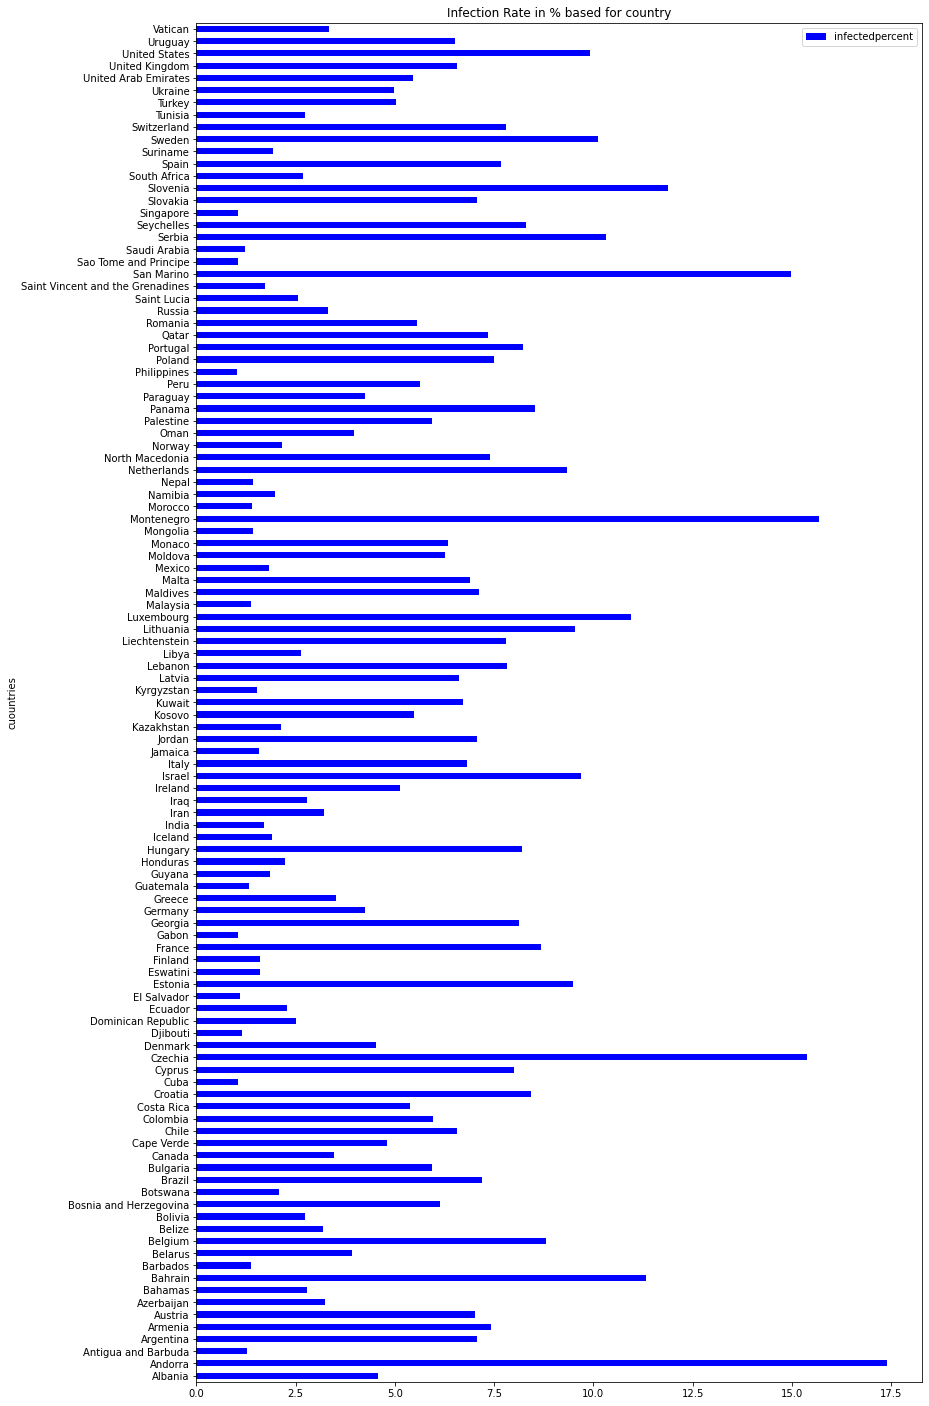

In [6]:
plt.rcParams['figure.figsize'] = [13, 25]
chart_dataset[['cuountries', 'infectedpercent']].plot(x = 'cuountries', kind = 'barh', color = "blue")
plt.title('Infection Rate in % based for country')
plt.show()

In [10]:
# Next query 
mydict = {
"new_cases" : []     
}




try:
    mydb = con.connect(
      host="localhost",
      user="root",
      password="pilivesa",
      database="portofolioproject "
    )
    
    # SQL Query
    sql_select_Query = "select location, date, new_cases,  population from coviddeaths" 
    sql_select_Query = sql_select_Query + " where location like \"Albania\"  && new_cases > 0  order by 2;"
    
    
    cursor = mydb.cursor()
    cursor.execute(sql_select_Query)
    
    # get all records
    records = cursor.fetchall()
    
    # Handling datas
    for row in records:
        # print( row )
        mydict["new_cases"].append(row[2])

        
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
    
finally:
    if mydb.is_connected():
        mydb.close()
        cursor.close()
        print("MySQL connection is closed")
        
chart_dataset = pd.DataFrame(mydict)
# plt.rcParams['figure.figsize'] = [10, 15]
# count, bin_edges = np.histogram( chart_dataset["new_cases"] )
# chart_dataset[["new_cases"]].plot( kind = "hist", color = "red", xticks = bin_edges )
# plt.title('The spread of infection in Albania')
# plt.show()

MySQL connection is closed


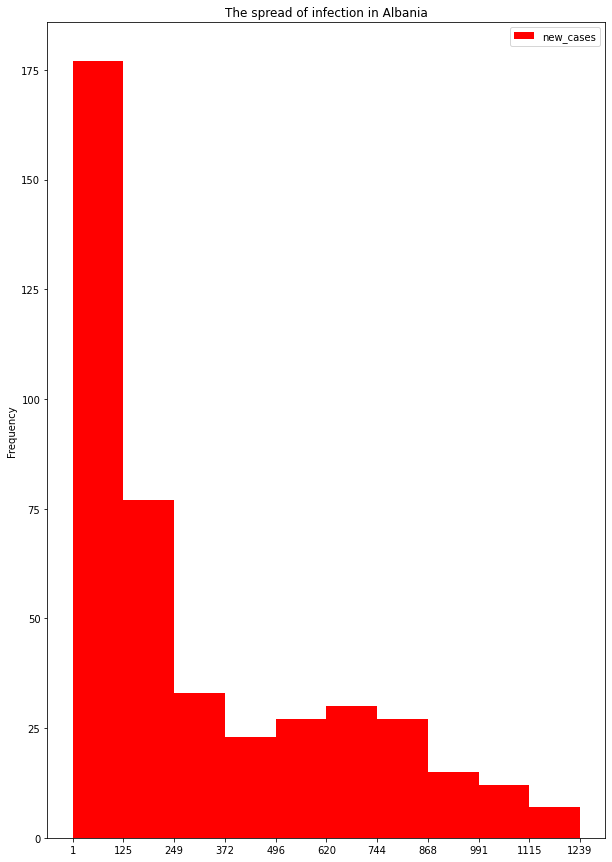

In [11]:
plt.rcParams['figure.figsize'] = [10, 15]
count, bin_edges = np.histogram( chart_dataset["new_cases"] )
chart_dataset[["new_cases"]].plot( kind = "hist", color = "red", xticks = bin_edges )
plt.title('The spread of infection in Albania')
plt.show()


In [5]:
# Next query 
mydict = {
"cuountries" : [],
"icu_patients_per_country" : [],  
"total_cases" : [],  
"total_icu_patients" : [],  
}




try:
    mydb = con.connect(
      host="localhost",
      user="root",
      password="pilivesa",
      database="portofolioproject "
    )
    
    # SQL Query
    sql_select_Query = "select location,  sum( icu_patients ) as icu_patients_per_country,  max( total_cases ) as total_cases , (  sum( icu_patients)  / max( total_cases ) ) * 100 as total_icu_patients "
    sql_select_Query = sql_select_Query + " from coviddeaths "
    sql_select_Query = sql_select_Query + "where location not like \"location\" && continent not like \"\"  group by location  having total_icu_patients >= 1 order by 1, 4 desc ;"
    
    
    cursor = mydb.cursor()
    cursor.execute(sql_select_Query)
    
    # get all records
    records = cursor.fetchall()
    
    # Handling datas
    for row in records:
        # print( row )
        mydict["cuountries"].append(row[0])
        mydict["icu_patients_per_country"].append(row[1])
        mydict["total_cases"].append(row[2])
        mydict["total_icu_patients"].append(row[3])

        
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
    
finally:
    if mydb.is_connected():
        mydb.close()
        cursor.close()
        print("MySQL connection is closed")
        
chart_dataset = pd.DataFrame(mydict)

MySQL connection is closed


In [21]:
# chart_dataset.dtypes


In [7]:
chart_dataset["icuPatientsPerCountry"] = chart_dataset["icu_patients_per_country"].astype('float64' ) 
chart_dataset["totalIcuPatients"] = chart_dataset["total_icu_patients"].astype('float64' ) 

In [35]:
# chart_dataset.dtypes

In [10]:
chart_dataset.drop( "icu_patients_per_country", axis = 1, inplace = True )
chart_dataset.drop( "total_icu_patients", axis = 1, inplace = True )

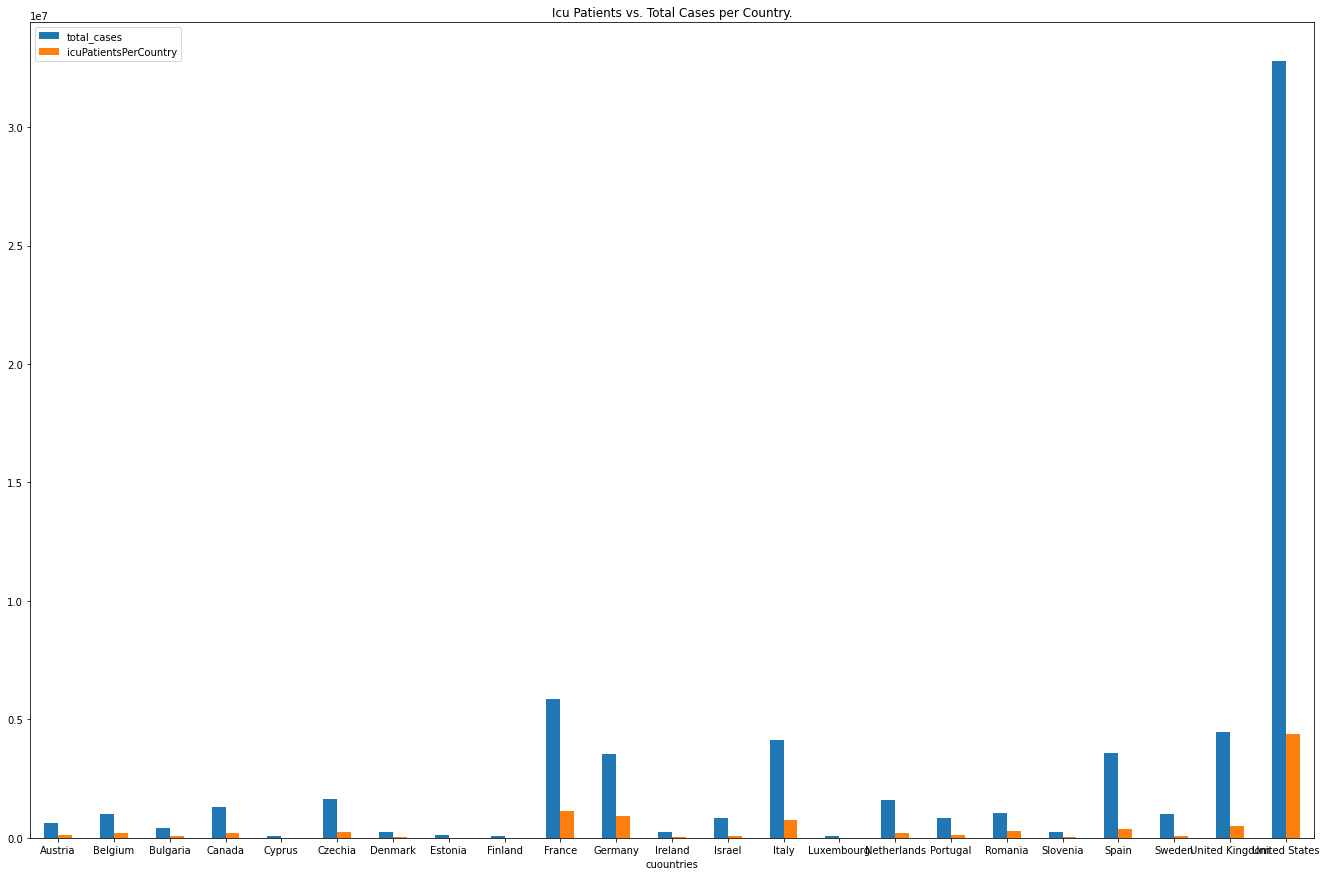

In [31]:
# plt.rcParams['figure.figsize'] = [10, 15]
chart_dataset[['cuountries',  'total_cases','icuPatientsPerCountry' ]].plot(x = 'cuountries', kind = 'bar', figsize=(23, 15), rot = 0 )
# chart_dataset[['cuountries',  'total_cases','icuPatientsPerCountry' ]].plot(x = 'cuountries', kind = 'bar', figsize=(23, 15), stacked = True,  rot = 0 )

plt.title('Icu Patients vs. Total Cases per Country.')
plt.show()

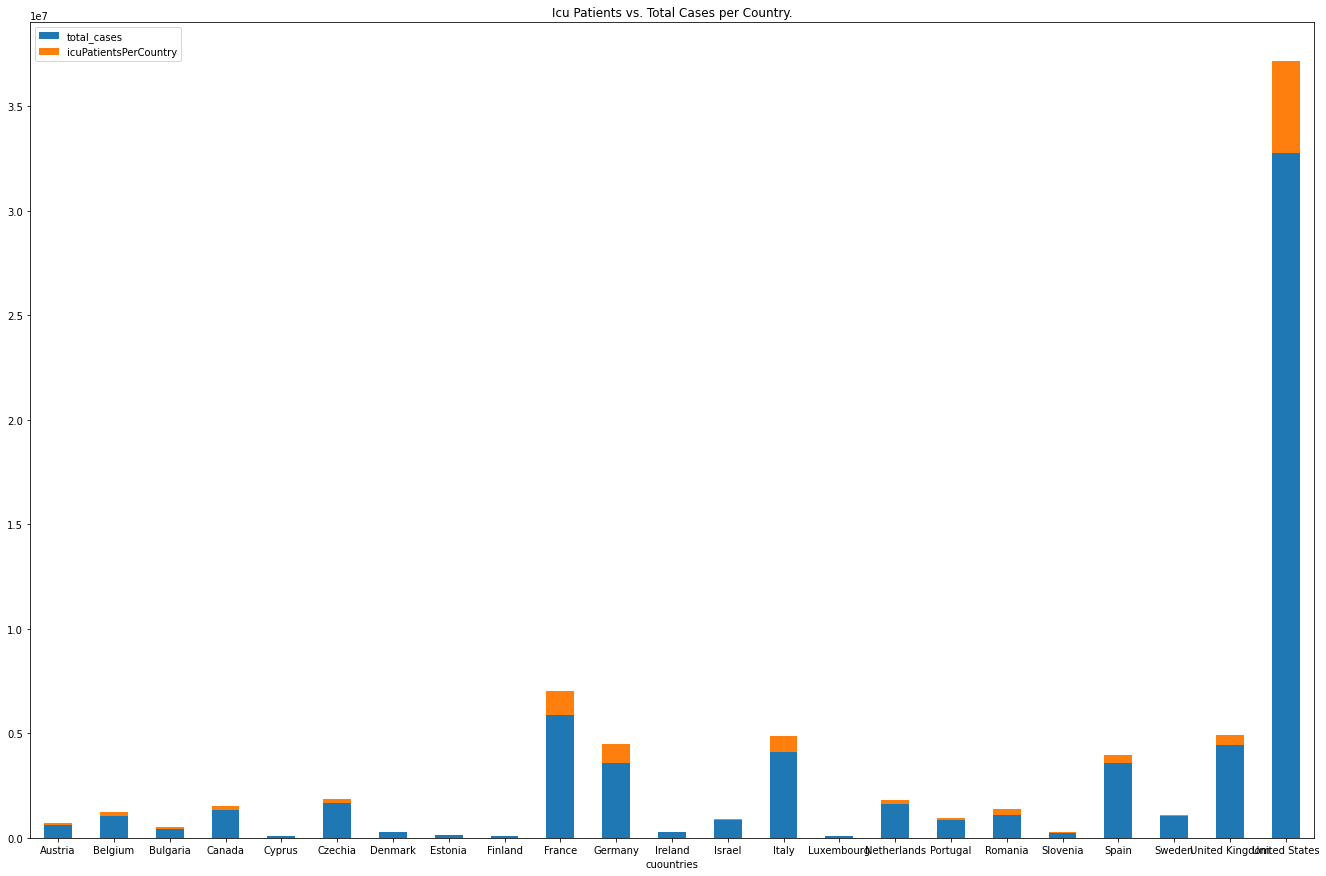

In [33]:
chart_dataset[['cuountries',  'total_cases','icuPatientsPerCountry' ]].plot(x = 'cuountries', kind = 'bar', figsize=(23, 15), stacked = True,  rot = 0 )

plt.title('Icu Patients vs. Total Cases per Country.')
plt.show()

In [50]:
# Next query 
mydict = {
"cuountries" : [],
"date" : [],  
"new_tests" : [],  
"new_vaccinations" : [],  
"new_deaths" : [],
"new_cases" : [],
}




try:
    mydb = con.connect(
      host="localhost",
      user="root",
      password="pilivesa",
      database="portofolioproject "
    )
    
    # SQL Query
    sql_select_Query = "select d.date, d.location, v.new_tests, v.new_vaccinations, d.new_deaths, d.new_cases from covidvaccinations as v "
    sql_select_Query = sql_select_Query + " inner join coviddeaths as d on v.location = d.location && d.date = v.date "
    sql_select_Query = sql_select_Query + " where d.location like \"Albania\" && d.new_deaths > 0 && d.new_cases > 0 && v.new_vaccinations > 0 "
    sql_select_Query = sql_select_Query + " order by 1 asc ; "
    
    cursor = mydb.cursor()
    cursor.execute(sql_select_Query)
    
    # get all records
    records = cursor.fetchall()
    
    # Handling datas
    for row in records:
        # print( row )
        mydict["date"].append(row[0])
        mydict["cuountries"].append(row[1])
        mydict["new_tests"].append(row[2])
        mydict["new_vaccinations"].append(row[3])
        mydict["new_deaths"].append(row[4])
        mydict["new_cases"].append(row[5])


        
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
    
finally:
    if mydb.is_connected():
        mydb.close()
        cursor.close()
        print("MySQL connection is closed")
        
chart_dataset = pd.DataFrame(mydict)

MySQL connection is closed


In [51]:
chart_dataset.head()


,cuountries,date,new_tests,new_vaccinations,new_deaths,new_cases
0,Albania,2021/1/13,3307,60,4,707
1,Albania,2021/1/14,3695,78,5,660
2,Albania,2021/1/15,3530,42,4,641
3,Albania,2021/1/16,3029,61,5,581
4,Albania,2021/1/17,2521,36,7,474


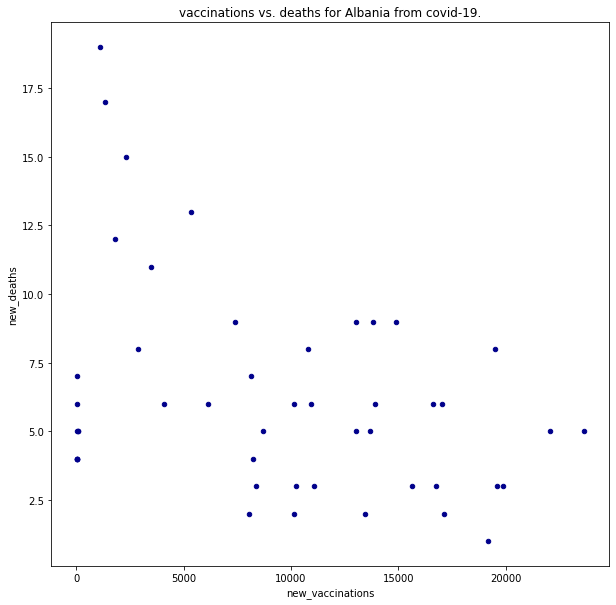

In [65]:
chart_dataset.plot.scatter(x='new_vaccinations', y='new_deaths', c='DarkBlue',  figsize=(10, 10))
plt.title('vaccinations vs. deaths for Albania from covid-19.')
plt.xlabel("new_vaccinations")
plt.ylabel("new_deaths")
plt.show()

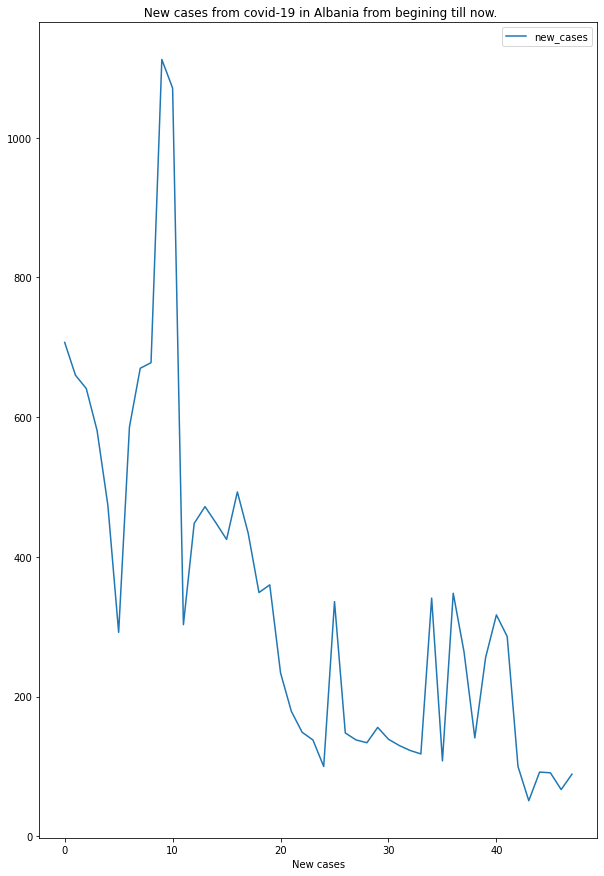

In [67]:
chart_dataset[["new_cases"]].plot.line(  figsize=(10, 15) )
plt.title(' New cases from covid-19 in Albania from begining till now.')
plt.xlabel("New cases")
plt.show()